# First evaluation insights for the Abilene network

This notebook is copied and adjusted from the Airtel notebook.

**Inputs:**
* Algorithms: bjointsp, random
* Network: Abilene
* Service: fw1chain, fw2chain, fw3chain
* Sources: source0-9

Abilene a standard, small network used for experiments. The figure shows the network with the node labels and IDs in black as well as link delays (in ms) in red between the nodes.

![Abilene](../docs/abilene.jpg)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# include and import util/eval.py
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from util import eval


bjointsp_chain_df, bjointsp_aux_chain_df, bjointsp_vnf_df, bjointsp_aux_vnf_df = eval.prepare_eval('Abilene', 'bjointsp')
random_chain_df, random_aux_chain_df, random_vnf_df, random_aux_vnf_df = eval.prepare_eval('Abilene', 'random')

There are eight different pandas dataframes, four for each of the placement algorithms. 

chain_df contains the delays (RTTs) of the whole chain and vnf_df contains the inter-VNF delays. They have separate columns for the simulation and emulation RTTs and additional columns for the difference and the ratio between simulation and emulation RTT.

For easier plotting later, aux_chain_df and aux_vnf_df contain the same data as chain_df and vnf_df, respectiveley, just in a different structure: Here, there is just one column called 'rtt'. Simulation and emulation delays are stored in the same column in different rows. They are distinguished by a new column 'type' that is either 'sim' or 'emu', classifying the type of RTT.

For better intuition, see the tables below.

In [3]:
bjointsp_chain_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Abilene.graphml,11,14,fw1chain.yaml,3,source0.yaml,1,bjointsp,6.0,7.1,1.1,1.183333
1,Abilene.graphml,11,14,fw1chain.yaml,3,source1.yaml,1,bjointsp,6.0,7.1,1.1,1.183333
2,Abilene.graphml,11,14,fw1chain.yaml,3,source2.yaml,1,bjointsp,8.0,9.1,1.1,1.137500
3,Abilene.graphml,11,14,fw1chain.yaml,3,source3.yaml,1,bjointsp,8.0,9.1,1.1,1.137500
4,Abilene.graphml,11,14,fw1chain.yaml,3,source4.yaml,1,bjointsp,14.0,15.1,1.1,1.078571


In [4]:
bjointsp_aux_chain_df.head()

,algorithm,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,rtt,type
0,bjointsp,Abilene.graphml,11,14,fw1chain.yaml,3,source0.yaml,1,6.0,sim
1,bjointsp,Abilene.graphml,11,14,fw1chain.yaml,3,source1.yaml,1,6.0,sim
2,bjointsp,Abilene.graphml,11,14,fw1chain.yaml,3,source2.yaml,1,8.0,sim
3,bjointsp,Abilene.graphml,11,14,fw1chain.yaml,3,source3.yaml,1,8.0,sim
4,bjointsp,Abilene.graphml,11,14,fw1chain.yaml,3,source4.yaml,1,14.0,sim


In [5]:
bjointsp_vnf_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Abilene.graphml,11,14,fw1chain.yaml,3,source0.yaml,1,bjointsp,vnf_user,vnf_fw1,2.0,2.210,0.210,1.10500
1,Abilene.graphml,11,14,fw1chain.yaml,3,source0.yaml,1,bjointsp,vnf_fw1,vnf_web,4.0,4.238,0.238,1.05950
2,Abilene.graphml,11,14,fw1chain.yaml,3,source1.yaml,1,bjointsp,vnf_user,vnf_fw1,2.0,2.203,0.203,1.10150
3,Abilene.graphml,11,14,fw1chain.yaml,3,source1.yaml,1,bjointsp,vnf_fw1,vnf_web,4.0,4.223,0.223,1.05575
4,Abilene.graphml,11,14,fw1chain.yaml,3,source2.yaml,1,bjointsp,vnf_user,vnf_fw1,2.0,2.191,0.191,1.09550


## Chain RTT

Let's start the evaluation by analyzing the RTT of the whole chain, comparing the different placement algorithms.

Text(0.5,1,'Emulation chain RTT')

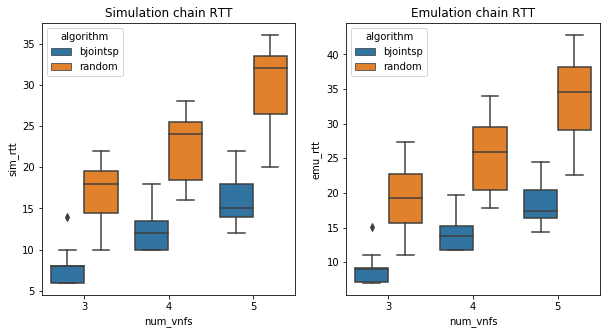

In [6]:
# comparison of bjointsp and random placement
# df with combined/concatenated results of both bjointsp and random
chain_df = pd.concat([bjointsp_chain_df, random_chain_df])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='num_vnfs', y='sim_rtt', hue='algorithm', data=chain_df, ax=ax1).set_title('Simulation chain RTT')
sns.boxplot(x='num_vnfs', y='emu_rtt', hue='algorithm', data=chain_df, ax=ax2).set_title('Emulation chain RTT')

Clearly, random placement leads to much higher simulation and emulation delays than bjointsp. For both, the delays increase notably with increasing chain length (num_vnfs).

Compared to the large Airtel network, the difference between bjointsp and random placement is not as big in the small Abilene network.

Text(0.5,1,'Random chain RTT')

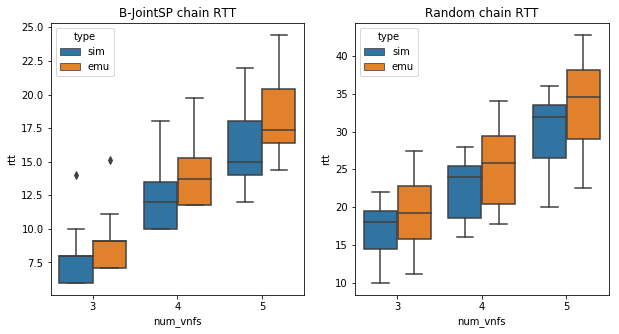

In [7]:
# comparison of simulation and emulation delays
# this is what aux_chain_df is for
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=bjointsp_aux_chain_df, ax=ax1).set_title('B-JointSP chain RTT')
sns.boxplot(x='num_vnfs', y='rtt', hue='type', data=random_aux_chain_df, ax=ax2).set_title('Random chain RTT')

Compared to the Airtel network, the difference between simulation and emulation appears much larger in the Abilene network.


### Chain RTT difference

Absolute difference between emulated and simulated chain RTT: emu_rtt - sim_rtt

Text(0.5,1,'Random chain RTT difference')

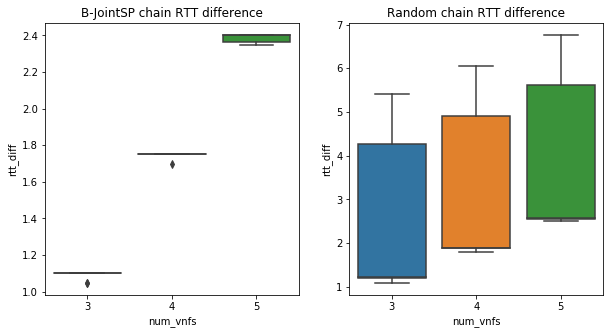

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_chain_df, ax=ax1).set_title('B-JointSP chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_chain_df, ax=ax2).set_title('Random chain RTT difference')

Looking at the difference in RTT, the emulation delay is clearly higher than the simulation delay. And the difference between the two increases with increasing chain length. There is surprisingly little deviation/spread in rtt_diff for each chain length.

For random placement, the difference is significant and there is also considerable spread of rtt_diff, even within each chain length. What else influences the RTT difference here? Generally, the Abilene network has much smaller link delays, where the rounding to integers has a much larger effect. Does that explain something?


### Chain RTT ratio

Relative ratio of emulated vs. simulated chain RTT: emu_rtt / sim_rtt

Text(0.5,1,'Chain RTT ratio')

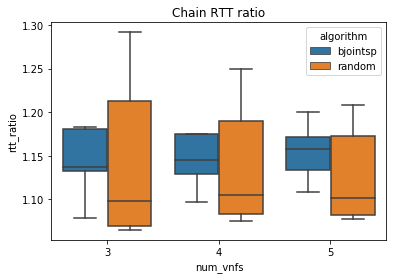

In [9]:
sns.boxplot(x='num_vnfs', y='rtt_ratio', hue='algorithm', data=chain_df).set_title('Chain RTT ratio')

**B-JointSP**: While the absolute difference between emulated and simulated chain RTT clearly increases for increasing chain length, the relative ratio of the two stays fairly constant at slightly above 1.

**Random**: While the RTT difference is higher, random placement actually has a lower ratio RTT ratio compared to B-JointSP. However, the spread is larger. Why?

## Inter-VNF RTT
Let's do the same for inter-VNF delays/RTTs. Now, we're looking at two VNFs in isolation, i.e., independent of the rest of the chain. Thus, we're not considering chain length.

Text(0.5,1,'Inter-VNF RTT')

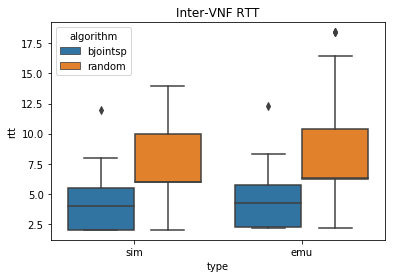

In [10]:
aux_vnf_df = pd.concat([bjointsp_aux_vnf_df, random_aux_vnf_df])

sns.boxplot(x='type', y='rtt', hue='algorithm', data=aux_vnf_df).set_title('Inter-VNF RTT')

As expected, random placement also leads to much higher inter-VNF delays than bjointsp. 
The difference between simulation and emulation delays seems to be negligible when considering inter-VNF RTTs. Let's look into that further.

### Inter-VNF RTT difference

Absolute difference between emulated and simulated inter-VNF RTT: emu_rtt - sim_rtt

Text(0.5,1,'Inter-VNF RTT difference (zoomed)')

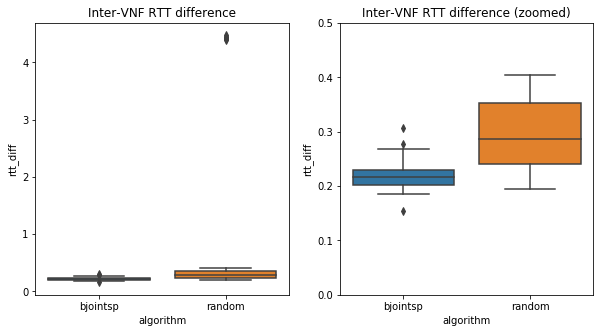

In [17]:
vnf_df = pd.concat([bjointsp_vnf_df, random_vnf_df])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df, ax=ax1).set_title('Inter-VNF RTT difference')
# zoomed in
ax2.set_ylim([0, 0.5])
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df, ax=ax2).set_title('Inter-VNF RTT difference (zoomed)')

The absolute difference between simulated and emulated inter-VNF RTTs is rather small. 

For bjointsp, it is generally smaller than for random placement. Also the spread is smaller for bjointsp. This is probably due to the longer paths in random placement, which allow for more deviation between simulation and emulation. (Similar to the observation for chain RTTs.)

*What are the outlier(s) in random placement?*

Text(0.5,1,'Random inter-VNF RTT difference')

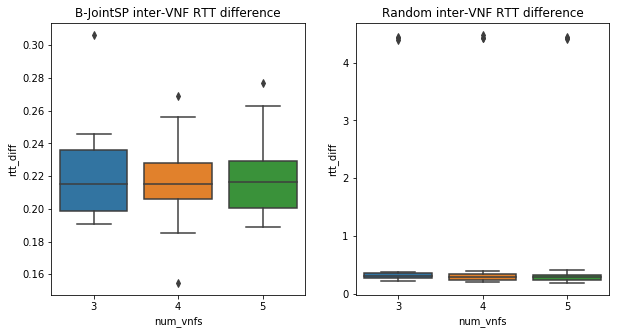

In [12]:
# plot RTT difference for different chain lengths
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP inter-VNF RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_vnf_df, ax=ax2).set_title('Random inter-VNF RTT difference')

Other than for chain RTTs, the chain length does not affect the inter-VNF RTT and cannot explain the large spread in inter-VNF RTT difference.

Text(0.5,1,'Random placement')

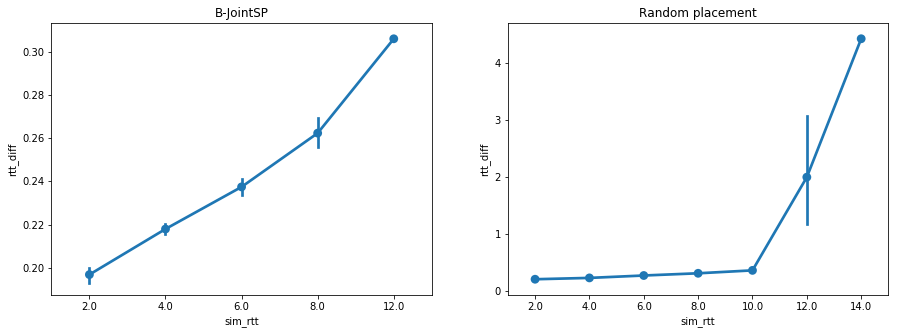

In [13]:
# plot RTT difference as a variable of the node distance = link delay = sim delay/RTT
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.pointplot(x='sim_rtt', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP')
sns.pointplot(x='sim_rtt', y='rtt_diff', data=random_vnf_df, ax=ax2).set_title('Random placement')

The difference of emulated and simulated inter-VNF RTTs increases with increasing simulated inter-VNF RTT. The simulated inter-VNF RTT directly reflects the link delay and thus distance between two connected VNFs.

Hence, for two very close VNFs, the simulated and emulated delays are almost identical, but for VNFs that are placed farther away (higher sim_rtt), the emulated delay can be significantly larger than the simulated delay.

This holds for both placement algorithms. *But why does it look so differently for random placement?*


### Inter-VNF RTT ratio

Relative ratio of emulated vs. simulated inter-VNF RTT: emu_rtt / sim_rtt

Set to infinity if sim_rtt = 0.

In [14]:
# set infinite ratios to NaN, so they are ignored when plotting
print('Entries with inifinite ratio: {}'.format(vnf_df['rtt_ratio'].loc[vnf_df['rtt_ratio'] == np.inf].count()))
vnf_df = vnf_df.replace(np.inf, np.nan)

Entries with inifinite ratio: 0


Text(0.5,1,'Inter-VNF RTT ratio')

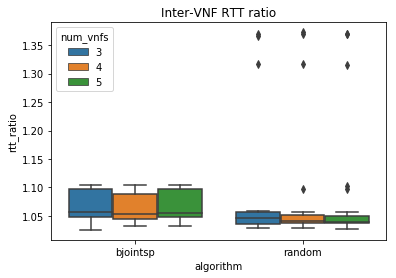

In [15]:
sns.boxplot(x='algorithm', y='rtt_ratio', hue='num_vnfs', data=vnf_df).set_title('Inter-VNF RTT ratio')

Similar to the chain RTT ratio, the inter-VNF RTT ratio is pretty much constant with increasing chain length and very close to 1.

While very close to 1 for both algorithms, bjoint sp has slightly higher ratios with significantly higher spread than random placement. This is likely due to the overall longer paths between VNFs in random placment, which lead to a lower relative ratio between emulated and simulated delay.

# Conclusion

* Mostly similar to Airtel
* Much higher difference between simulation and emulation, especially for random placement
* Much higher spread of chain RTT difference within a chain length. Why?
* Some outliers in inter-VNF RTT difference for random placement. Why?